<a href="https://colab.research.google.com/github/Muhammad-Saad-2/Langgraph-/blob/main/langgraph_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip freeze > requirements.txt

In [ ]:
! pip install langgraph
!pip install typing_extensions


In [7]:
from typing_extensions import TypedDict

class Learningstate(TypedDict):
  prompt : str
  output : str

In [8]:
 online_state: Learningstate = Learningstate(prompt = "hello from online class ")

In [9]:
print(online_state["prompt"])

hello from online class 


In [10]:
def node_1(state: Learningstate)->Learningstate:
  print("__node 1__", state)
  return {"prompt": state["prompt"] + " I am learning neural networks "}

def node_2(state: Learningstate)->Learningstate:
  print("__node 2__", state)
  return {"prompt": state["prompt"] + "all i wish is to be a great neural network engineer"}

In [11]:
from  IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

#building a graph
builder:StateGraph = StateGraph(state_schema=Learningstate)

In [12]:
#Nodes
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

In [13]:
# logic for edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [14]:
from langgraph.graph.state import CompiledStateGraph #type


graph:CompiledStateGraph = builder.compile()

In [15]:
print(graph)
print(graph.get_graph)

<bound method CompiledGraph.get_graph of <langgraph.graph.state.CompiledStateGraph object at 0x7dd6e720f610>>


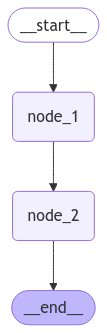

In [16]:
display (Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({'prompt': "yes"})

__node 1__ {'prompt': 'yes'}
__node 2__ {'prompt': 'yes I am learning neural networks '}


{'prompt': 'yes I am learning neural networks all i wish is to be a great neural network engineer'}

In [18]:
from google.colab import userdata

In [19]:
google_api_key = userdata.get("GOOGLE_API_KEY")


In [ ]:
!pip install langchain_google_genai

In [21]:
from langchain_google_genai import ChatGoogleGenerativeAI

#initialize an instnace of the ChatGoogleGenerativeAi
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash", #clarify which model to use
    api_key = google_api_key,  #pass the API keys for authentication
)



In [25]:
from langchain_core.messages.ai import AIMessage

ai_msg : AIMessage = llm.invoke("hello from langchain")
print(ai_msg)

content='Hello from a helpful AI!  How can I help you today?' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-b104f9d2-6094-4fd5-aca8-8178d0bb61f1-0' usage_metadata={'input_tokens': 5, 'output_tokens': 15, 'total_tokens': 20, 'input_token_details': {'cache_read': 0}}


In [26]:
print(ai_msg.content) #using .content since the the response from the llm is stored in the content

Hello from a helpful AI!  How can I help you today?


In [27]:
print(type(ai_msg))

<class 'langchain_core.messages.ai.AIMessage'>
